# Final project!!!

## My libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, roc_auc_score, precision_score,f1_score,classification_report
from sklearn import tree
from sklearn.model_selection import train_test_split
from IPython.display import display
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier


## Part 1

### Subject Matter

The subject that the data that we got is based on heating power in building. There are different types of measurements based on each month. The data can be used for time series because it has year and month var

#### Breakdown of features and its types

### Features

Year= Numeric variable which represents the year observation was recorded.

Month= Numeric variable which represents the month observation was recorded.

Sector= Categorical variable which represents the typical use of the building.

Size= Continuous variable which floor size in square meters.

District= Categorical variable which represents the district the building resides in.

Elevation= Continuous variable which represents ground elevation in meters at building location.

Floors= Numeric variable which represents number of floors in a building.

Built= Numeric variable which represents the year this building was built.

tmp_min= Continuous variables which represents minimum monthly temperature.

tmp_mean= Continuous variables which represents mean monthly temperature.

tmp_max= Continuous variables which represents maximum monthly temperature.

Cost= Continuous variables which represents cost of heating for given month.

Source= Categorical variable which represents source of heating in the building.


### Size of data set

In [2]:
csv_file = pd.read_csv('energy_source1.csv')
del csv_file['measure']
csv_file2 = csv_file
csv_file2.shape

(36000, 13)

## Part 2 


In [3]:
missingValues = round(csv_file2.isna().sum(),2)
print("Missing Values Count=")
print(missingValues)

Missing Values Count=
year            0
month         597
sector       1414
size            0
district        0
elevation       0
floors        551
built         564
tmp_min         0
tmp_mean     3434
tmp_max       639
cost         1376
source          0
dtype: int64


#### Missing Data

7 out of the 13 variables have several missing values. strategies that could be used is deleting those observations, replacing those values, imputation and else. I am going to use all the techniques for different variables to get rid of the missing data.

In [4]:
csv_file2['tmp_max'] = csv_file2['tmp_max'].fillna(method='ffill')

In [5]:
csv_file2['tmp_mean'] = csv_file2['tmp_mean'].fillna((csv_file2['tmp_min']+csv_file2['tmp_max'])/2)

In [6]:
csv_file2 = csv_file2.dropna()


In [7]:
print("Number of rows before handling missing data was {}".format(len(csv_file)))
print("Number of rows after handling missing data is {}".format(len(csv_file2)))
sbo= len(csv_file2)

Number of rows before handling missing data was 36000
Number of rows after handling missing data is 31718


#### Outliers

The 2 variables I believe might have some sort of outliers are size and cost. I will check for outliers in these variables and remove those observations which are outliers.

In [8]:
def outlier(x,y):
    q1 = y.quantile(.25)
    q3 = y.quantile(.75)
    
    iqr = q3 - q1
    
    lower_bound = q1 -(1.5 * iqr)
    upper_bound = q3 +(1.5 * iqr)
    
    x = x[(y >= lower_bound) & (y <= upper_bound)]   
    return x


In [9]:
csv_file_copy = outlier(csv_file2,csv_file2['cost'])
csv_file_copy = outlier(csv_file2,csv_file2['size'])

In [10]:
csv_file2 = csv_file_copy
sao = len(csv_file2)
print("Data size before handling outliers= {}".format(sbo))
print("Data size after handling outliers= {}".format(sao))

Data size before handling outliers= 31718
Data size after handling outliers= 30343


In [11]:
csv_file2.to_csv('Energy_manipulated_data.csv')

## Part Three


#### Co Relation Among Features

In [12]:
csv_file2.corr()

,year,month,size,district,elevation,floors,built,tmp_min,tmp_mean,tmp_max,cost
year,1.000000,0.001470,-0.002782,0.002102,-0.002923,0.000224,0.002634,-0.002670,-0.002368,-0.001337,0.000743
month,0.001470,1.000000,0.001532,0.002438,0.000558,0.001678,0.001585,-0.007494,-0.009659,-0.010714,0.004112
size,-0.002782,0.001532,1.000000,0.041644,-0.038987,0.035268,-0.015216,0.001364,0.000782,-0.000292,0.453249
district,0.002102,0.002438,0.041644,1.000000,0.062308,0.048266,-0.084855,0.002691,0.002599,0.002927,0.088590
elevation,-0.002923,0.000558,-0.038987,0.062308,1.000000,-0.034073,-0.116027,0.001560,0.001374,-0.001196,-0.024842
floors,0.000224,0.001678,0.035268,0.048266,-0.034073,1.000000,0.019407,0.001032,0.001859,0.001093,0.704526
built,0.002634,0.001585,-0.015216,-0.084855,-0.116027,0.019407,1.000000,-0.004142,-0.001533,0.000133,-0.000219
tmp_min,-0.002670,-0.007494,0.001364,0.002691,0.001560,0.001032,-0.004142,1.000000,0.970349,0.909345,-0.042031
tmp_mean,-0.002368,-0.009659,0.000782,0.002599,0.001374,0.001859,-0.001533,0.970349,1.000000,0.949404,-0.042286
tmp_max,-0.001337,-0.010714,-0.000292,0.002927,-0.001196,0.001093,0.000133,0.909345,0.949404,1.000000,-0.042201


### Feature Analysis

#### Sector

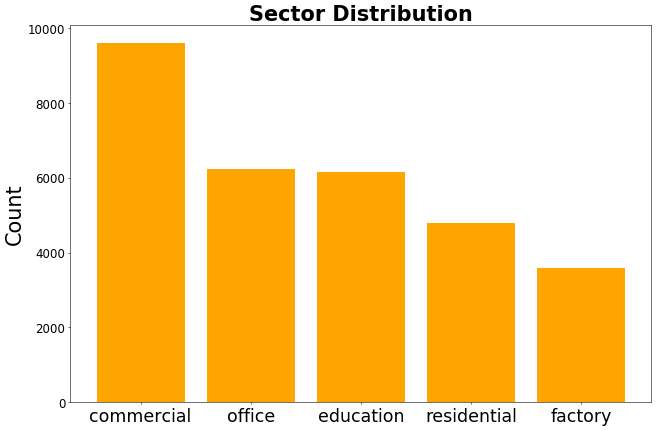

In [13]:
counts = csv_file2.sector.value_counts()
index = counts.index
fi, a = plt.subplots(figsize=(15,10), dpi=50)
colors = ['steelblue']
a.bar(index,counts, align='center', color='orange')
a.set_ylabel("Count")
a.set_title("Sector Distribution",fontweight='bold',fontsize= "30")
plt.xticks(fontsize=25)
plt.yticks(fontsize=17)
a.set_ylabel("Count" ,fontsize=30)
a

Looking at the graph, it seems that most of the buildings constructed were mainly for commercial puposes and then office and then education.

#### Size

The average size in sq yd is 487.0
The maximum size in sq yd in an observation 122.0
The minimum size in sq yd in an observation 1527.0
The data is slightly skewed towards the right


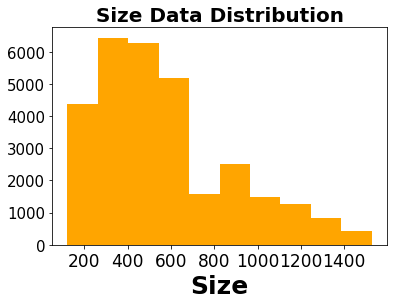

In [14]:
print("The average size in sq yd is {}".format(round(csv_file2['size'].median(),1)))
print("The maximum size in sq yd in an observation {}".format(round(csv_file2['size'].min(),1)))
print("The minimum size in sq yd in an observation {}".format(round(csv_file2['size'].max(),1)))
print("The data is slightly skewed towards the right")
plt.hist(csv_file2['size'],color='orange')
plt.xlabel('Size', fontweight='bold',fontsize=25)
plt.xticks(fontsize=17)
plt.yticks(fontsize=15)
plt.title("Size Data Distribution",fontsize=20,fontweight='bold')
plt.show()


#### District

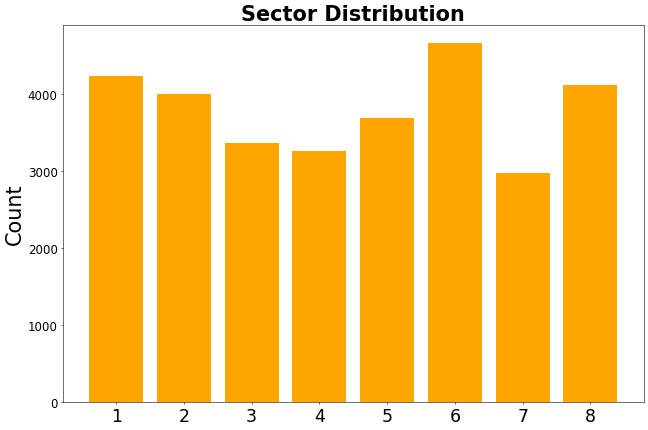

In [15]:
counts = csv_file2.district.value_counts()
index = counts.index
fi, a = plt.subplots(figsize=(15,10), dpi=50)
colors = ['orange']
a.bar(index,counts, align='center', color=colors)
a.set_ylabel("Count")
a.set_title("Sector Distribution",fontweight='bold',fontsize= "30")
plt.xticks(fontsize=25)
plt.yticks(fontsize=17)
a.set_ylabel("Count" ,fontsize=30)
a

The chart shows that the buildings are almost equally distributed in all the districts but as we can see, the district with the most buildings is district 6.

#### Floors with respect to Cost 

                cost
floors              
1.0       594.127752
2.0      1213.764033
3.0      1985.037450
4.0      2645.352833
5.0      3091.603540
6.0      3805.100787
7.0      4534.543869
8.0      4584.741308
9.0      5195.414297
10.0     2579.832404
11.0     5352.465657
12.0     4441.412441
13.0     7642.283395
14.0     6211.082871
15.0     5849.660188
16.0     5641.007454
17.0    11033.946381
18.0     7705.840284
19.0     5928.024174
20.0    16818.473461
21.0     6484.757965
22.0     9478.641181
23.0     9857.605644
24.0    13749.153686
25.0    11586.842181
26.0    13988.184851
27.0    18449.943475
28.0    11990.081079
29.0    19322.079871


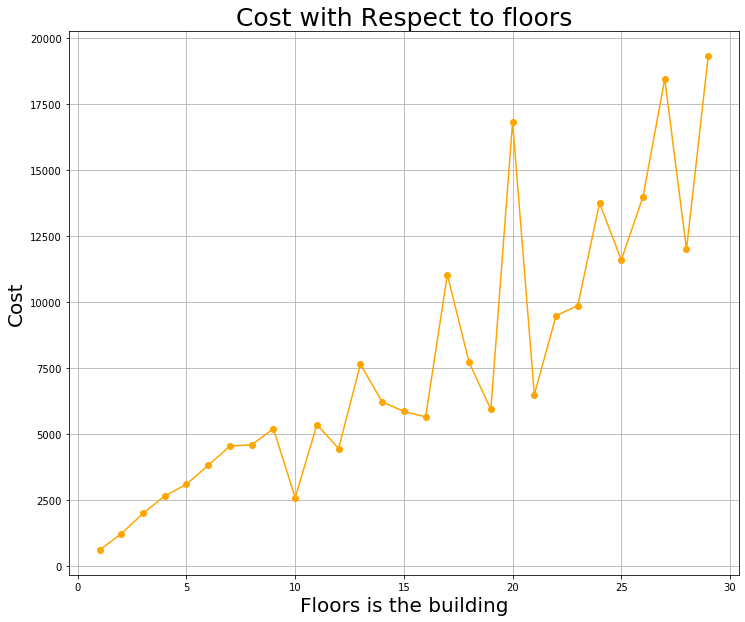

In [16]:
table = pd.pivot_table(csv_file2,index=['floors'],values=['cost'])
print(table)
table.index
plt.figure(figsize=(12,10))
plt.plot(table.index,table,marker= 'o',color ='orange')
plt.title("Cost with Respect to floors",fontsize=25)
plt.ylabel("Cost",fontsize=20)
plt.xlabel("Floors is the building",fontsize=20)

plt.grid()
plt.show()

The chart between number of floors and cost suggests that there is a linearity detected between number of floors and the cost of the building. The cost is directly proportional to the number of floors which means that if the number of floors increase, the cost is most likely to increase as well.

#### Built year

The year with the most buildings built was 1963.0
Oldest building was built in the year 1920.0
Oldest building was built in the year 2009.0
The data is bi-normally distributed


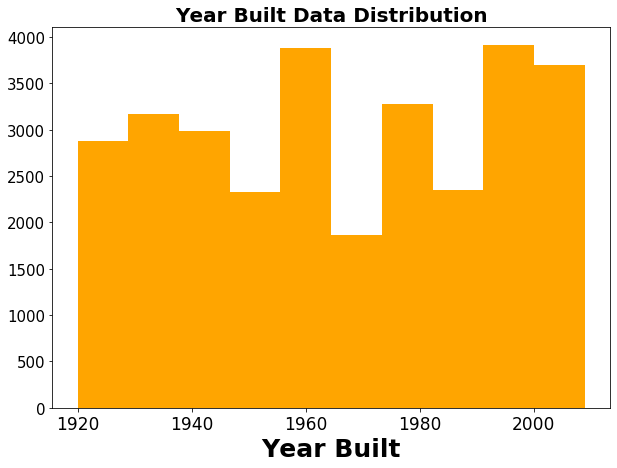

In [17]:
print("The year with the most buildings built was {}".format(csv_file2['built'].mode()[0]))
print("Oldest building was built in the year {}".format(round(csv_file2['built'].min(),1)))
print("Oldest building was built in the year {}".format(round(csv_file2['built'].max(),1)))
print("The data is bi-normally distributed")
plt.figure(figsize=(10,7))
plt.hist(csv_file2['built'],color='orange')
plt.xlabel('Year Built', fontweight='bold',fontsize=25)
plt.xticks(fontsize=17)
plt.yticks(fontsize=15)
plt.title("Year Built Data Distribution",fontsize=20,fontweight='bold')
plt.show()


#### Temperature

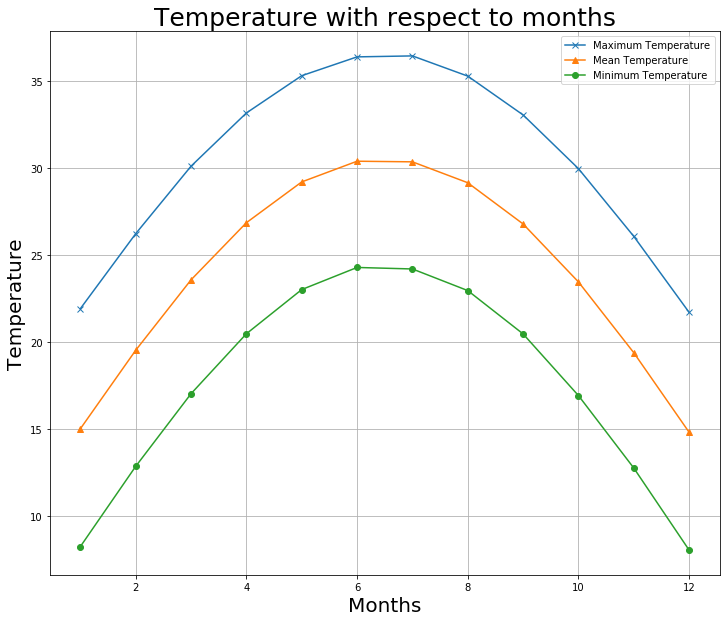

In [18]:
table_min = pd.pivot_table(csv_file2,index=['month'],values=['tmp_min'])
table_mean = pd.pivot_table(csv_file2,index=['month'],values=['tmp_mean'])
table_max = pd.pivot_table(csv_file2,index=['month'],values=['tmp_max'])
plt.figure(figsize=(12,10))
plt.plot(table_max.index,table_max,marker= 'x',label='Maximum Temperature')
plt.plot(table_mean.index,table_mean,marker= '^',label='Mean Temperature')
plt.plot(table_min.index,table_min,marker= 'o',label='Minimum Temperature')
plt.title("Temperature with respect to months",fontsize=25)
plt.ylabel("Temperature",fontsize=20)
plt.xlabel("Months",fontsize=20)
plt.xticks()
plt.legend()
plt.grid()
plt.show()

Looking at the plot of minimum, maximum, and mean temperature, there is definitely an indication of a trend in it. The temperature is high especially between between April and September and it gets low around the winter. This analysis indicates that the data is based on a location which has its summer during the months of May-June unlike countries like Australia, South Africa and else.

#### Cost with respect to month

              cost
month             
1.0    4899.780348
2.0    4583.080402
3.0    4315.200099
4.0    4263.454089
5.0    4219.573530
6.0    4253.534794
7.0    4315.713921
8.0    4329.877469
9.0    4241.540064
10.0   4322.650283
11.0   4682.071973
12.0   4966.069309


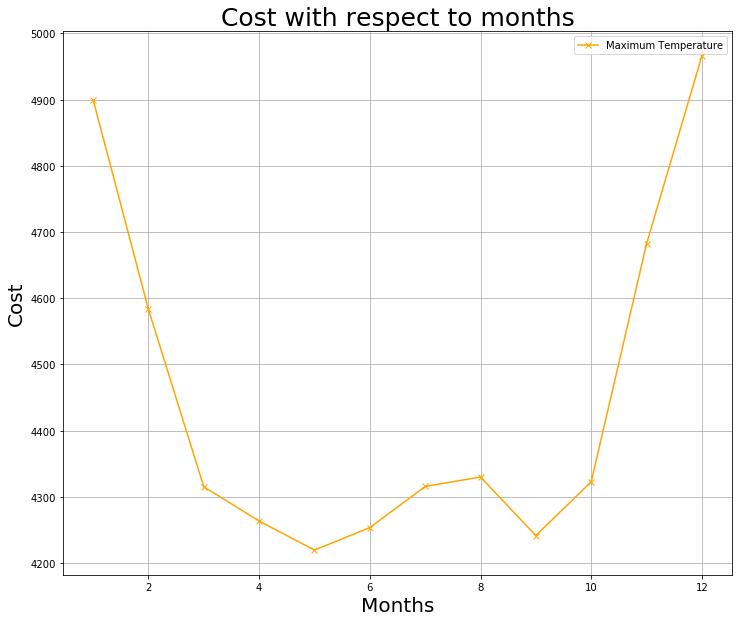

In [19]:
table = pd.pivot_table(csv_file2,index=['month'],values=['cost'])
print(table)
plt.figure(figsize=(12,10))
plt.plot(table.index,table,marker= 'x',label='Maximum Temperature',color='orange')
plt.title("Cost with respect to months",fontsize=25)
plt.ylabel("Cost",fontsize=20)
plt.xlabel("Months",fontsize=20)
plt.xticks()
plt.legend()
plt.grid()
plt.show()

The line chart supports the visualization which indicated about the location on which the data is based as you can see that the cost for heating drastically decreases during the months when temperature is high because we dont need to use the heating services during high temperatures which finally reduces the average cost in these specific months.

#### Source

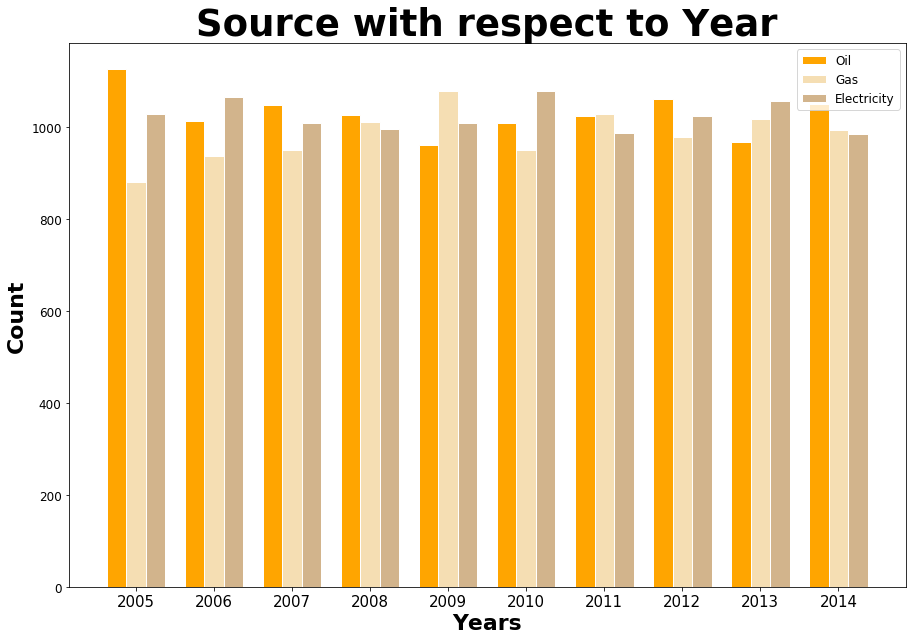

In [20]:
bars1 = []
bars2 = []
bars3 = []

sources = ['oil','gas','elec']
year = [2005,2006,2007,2008,2009,2010,2011,2012,2013,2014]

for i in sources:
    for j in year:
        x = len(csv_file2[(csv_file2['year'] ==j) & (csv_file2['source'] == i )])
        if i == 'oil':
            bars1.append(x)
        elif i == 'gas':
            bars2.append(x)
        if i == 'elec':
            bars3.append(x)
barWidth = 0.25
plt.figure(figsize=(15,10))
rowOne = np.arange(len(bars1))
rowTwo = [x + barWidth for x in rowOne]
rowThree = [x + barWidth for x in rowTwo]
plt.bar(rowOne, bars1, color='orange', width=barWidth, edgecolor='white', label='Oil')
plt.bar(rowTwo, bars2, color='wheat', width=barWidth, edgecolor='white', label='Gas')
plt.bar(rowThree, bars3, color='tan', width=barWidth, edgecolor='white', label='Electricity')
plt.xlabel('Years', fontweight='bold',fontsize=22)
plt.ylabel('Count', fontweight='bold',fontsize=22)
plt.title('Source with respect to Year', fontweight='bold',fontsize=37)

plt.xticks([r + barWidth for r in range(len(bars1))], ['2005','2006','2007','2008','2009','2010','2011','2012','2013','2014'],fontsize=15)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.show()


I assumed that there would be a hidden trend of electricity being one of the common sources of heat and that is the main reason to attempt this visualization. But looking at the results, I can say that even in buildings today, Oil and gas are still a competition to electricity in terms of being the source of heat in the building.

## Part Four (Classification Model)


#### Gaussian Naive Bayes Classifier


In [21]:
csv_file2["sector"] = csv_file2["sector"].astype('category')
csv_file2["sector_encoded"] = csv_file2["sector"].cat.codes

In [22]:
csv_file2["source"] = csv_file2["source"].astype('category')
csv_file2["source_encoded"] = csv_file2["source"].cat.codes

In [23]:
G_N_B = GaussianNB()

In [24]:
Xti, Xdi, yti, ydi = train_test_split(csv_file2.iloc[:,[4,6]],csv_file2.iloc[:,-1], test_size=0.6, random_state=6)


In [25]:
ypred = G_N_B.fit(Xti, yti).predict(Xdi)


              precision    recall  f1-score   support

           0       0.36      0.38      0.37      6184
           1       0.39      0.03      0.06      5862
           2       0.34      0.61      0.44      6160

    accuracy                           0.35     18206
   macro avg       0.36      0.34      0.29     18206
weighted avg       0.36      0.35      0.29     18206



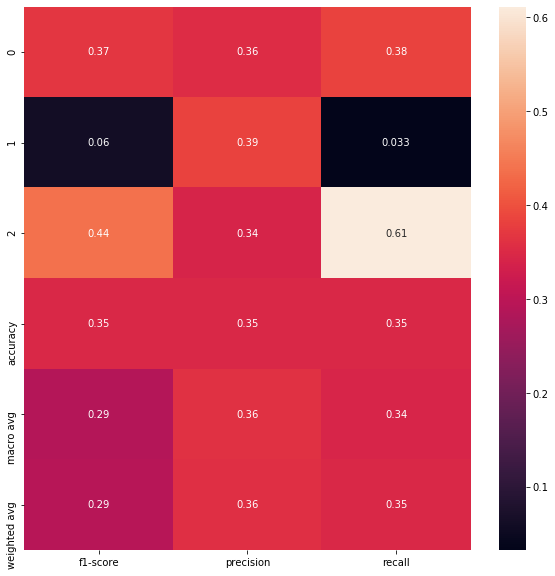

In [26]:
cr = classification_report(ydi, ypred,output_dict=True)
print(classification_report(ydi, ypred))


fi, m_ax = plt.subplots(figsize=(10,10))        
sns.heatmap(pd.DataFrame(cr).iloc[:-1, :].T, annot=True,ax=m_ax)

#### Decision Tree (Part One)

In [27]:
csv_file = csv_file.dropna()
csv_file["sector"] = csv_file["sector"].astype('category')
csv_file["sector_encoded"] = csv_file["sector"].cat.codes

              precision    recall  f1-score   support

        elec       0.43      0.47      0.45      3210
         gas       0.73      0.21      0.33      3033
         oil       0.35      0.55      0.43      3272

    accuracy                           0.42      9515
   macro avg       0.51      0.41      0.40      9515
weighted avg       0.50      0.42      0.40      9515



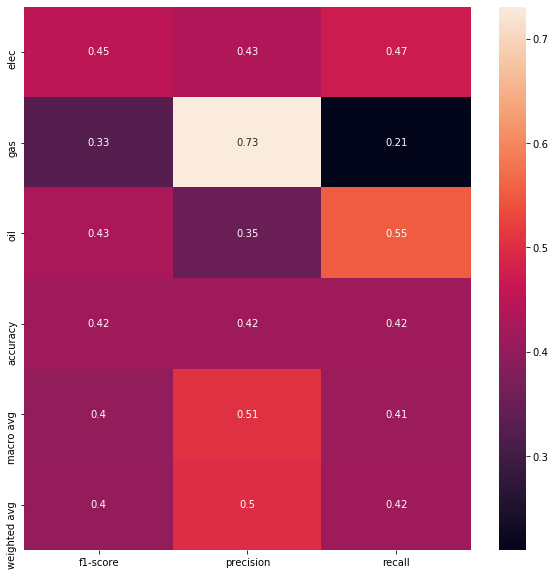

In [30]:
X = csv_file.iloc[:,[0,1,3,4,5,6,7,8,9,10,11,13]]
y = csv_file.source
Xti, Xdi, yti, ydi = train_test_split(X, y, test_size=0.7, random_state=60)
decision_object = DecisionTreeClassifier(max_depth=3, random_state=1)
decision_object.fit(Xti, yti)
cr = classification_report(yti, decision_object.predict(Xti),output_dict=True)
print(classification_report(yti, decision_object.predict(Xti)))
fi, m_ax = plt.subplots(figsize=(10,10))        
sns.heatmap(pd.DataFrame(cr).iloc[:-1, :].T, annot=True,ax=m_ax)


#### Decision Tree (Part Two)

              precision    recall  f1-score   support

        elec       0.53      0.58      0.56      3037
         gas       0.58      0.56      0.57      2988
         oil       0.41      0.39      0.40      3077

    accuracy                           0.51      9102
   macro avg       0.51      0.51      0.51      9102
weighted avg       0.51      0.51      0.51      9102



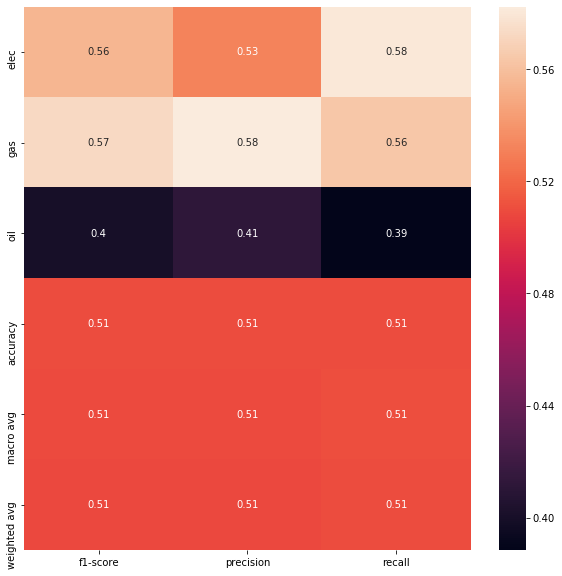

In [31]:
X = csv_file2.iloc[:,[3,4,6,11]]
y = csv_file2.source
Xti, Xdi, yti, ydi = train_test_split(X, y, test_size=0.7, random_state=100)
decision_object = DecisionTreeClassifier(max_depth=5, random_state=1)
decision_object.fit(Xti, yti)
cr = classification_report(yti, decision_object.predict(Xti),output_dict=True)
print(classification_report(yti, decision_object.predict(Xti)))
fi, m_ax = plt.subplots(figsize=(10,10))        
sns.heatmap(pd.DataFrame(cr).iloc[:-1, :].T, annot=True,ax=m_ax)


After running all the models and eventually looking at the results. I must say that this is not a good quality data as the variables are not so related to each other, making it difficult for the classification model to make any predictions. Although all the models showed poor performances but still you can see that the model worked best on the data I had manipulated and based on relevant features only.

## Summary


This dataset was pretty interesting because it had lots of techniques such as mathematical and statistical. This dataset was special because I had to find a relevant option because some values were missing. I have used many creative visualizations to present my analysis. In my opinion, Decision tree classifier is a more suited model to this kind of data because it gives better results with higher accuracy.